# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [2]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

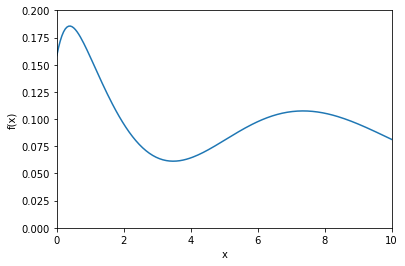

In [3]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [4]:
def genSample(npts):
    sample = []
    # YOUR CODE HERE
    m = 0.200
    
    while len(sample) < npts:
        r = random.random()
        xis = random.random() * 10
        #print(r)
        function = f(xis)
        if r*m < function:
            sample.append(xis)
    return numpy.array(sample)

In [5]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


Text(0.5,1,'Plot showing that the x values generated follow f(x)')

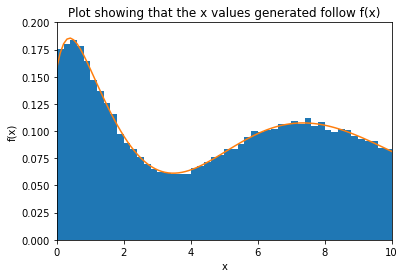

In [6]:
x_vals = numpy.linspace(0, 10, num=100)

bins = 50

xs_obtained = genSample(110000)

plt.hist(xs_obtained, bins=bins, density=True)

plt.plot(x_vals, f(x_vals))
plt.ylim((0,0.2))
plt.xlim((0,10))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot showing that the x values generated follow f(x)')